In [4]:
# Dependencies and set up
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [5]:
# Study data files
mouse_metadata_file = "Mouse_metadata.csv"
mouse_df = pd.read_csv(mouse_metadata_file)
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [6]:
# summary statistics for mouse_df data
mouse_df.describe()
# Three inferences or observation about the data
   # The data has 5 variables
   # The average weight of a mouse is slightly more than twice its age
   # There is more variability in the mice age compared to their weight.

,Age_months,Weight (g)
count,249.000000,249.000000
mean,12.730924,26.116466
std,7.228687,3.697003
min,1.000000,15.000000
25%,6.000000,25.000000
50%,13.000000,27.000000
75%,19.000000,29.000000
max,24.000000,30.000000


In [8]:
Study_results_file = "Study_results.csv"
study_df = pd.read_csv(Study_results_file)
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [9]:
# summary statistics of study_df data
study_df.describe()

# Three Observations
  # All variables have the same count
  # The mean fot time volume is higher than that of timpoint and metastatic sites
  # both timepoint and metastatic have a minimum value of zero 

,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659
std,14.079460,8.894722,1.137974
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.951474,1.000000
75%,30.000000,56.292200,2.000000
max,45.000000,78.567014,4.000000


In [10]:
# Merge the data into a single DataFrame
combine_data_df = pd.merge(mouse_df, study_df, on = ["Mouse ID", "Mouse ID"])
combine_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [24]:
# Check the number of mice
mice_count = len(combine_data_df["Mouse ID"].value_counts())
mice_count

249

In [11]:
# To identify duplicate mice by ID nunmber that shows up for Mouse ID and Timepoint
duplicated_mice = combine_data_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)
duplicated_mice



0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [12]:
# Find Duplicated mice and return Mouse ID
duplicated_mice_ID = combine_data_df.loc[duplicated_mice, 'Mouse ID'].unique()
duplicated_mice_ID


array(['g989'], dtype=object)

In [13]:
# Duplicated Mouse ID data
duplicated_mice_ID_data = combine_data_df.loc[combine_data_df['Mouse ID'] == duplicated_mice_ID[0]]
duplicated_mice_ID_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [17]:
# Create a clean data by dropping the duplicated mice by its ID
clean_data_df = combine_data_df.drop(duplicated_mice_ID_data.index)
clean_data_df

# There is only one duplicated mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [18]:
# check the number of mice in clean dataframe
mice_count_clean_data_df = len(clean_data_df["Mouse ID"].unique())
mice_count_clean_data_df 

248

In [19]:
# Create a group dataframe by  Drug Regimen
drug_regimen_gp = clean_data_df.groupby("Drug Regimen")
drug_regimen_gp.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [20]:
# Generate Summary Statistics for Tumor Volume (mm3)
summary_table = drug_regimen_gp['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg_df = summary_table.rename(columns={
    'mean':'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard deviation',
    'sem': 'SEM'
})

summary_agg_df
# Three observations from summary_agg_df Table
# There is more variability(8.27) in ketapril drug regimen than the other drug regimen
# Ketapril drug regimen also have the highest mean(55.23) compared to the rest of the drug regimen
# The mean and the median value for all drug regimen is at least 40
# Ramicane has the least SEM(0.320955)

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [21]:
# Calculate number of mice per Drug Regimen
mice_count_per_regimen = drug_regimen_gp['Mouse ID'].count().sort_values(ascending=False)
mice_count_per_regimen

# THREE OBSERVATION
# Capomulin drug regimen was applied to more mice than the other drug regimen
# Propriva regimen was applied to the least number of mice
# A particular drug regimen was applied to at least 148 mice

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

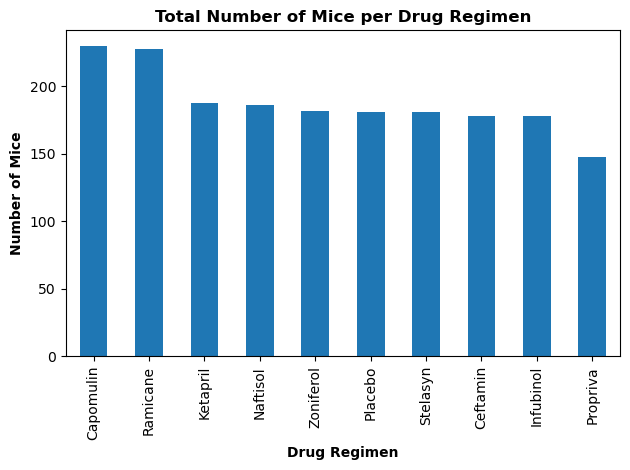

In [22]:
# Generate a bar plot showing the total number of mice for each treatment using pandas
pd_bar_mice_per_regimen = mice_count_per_regimen.plot(kind='bar', width=0.5)

# Assigning x label, y label and title
pd_bar_mice_per_regimen.set_title(label='Total Number of Mice per Drug Regimen', fontweight = 'bold')
pd_bar_mice_per_regimen.set_xlabel('Drug Regimen', fontweight = 'bold')
pd_bar_mice_per_regimen.set_ylabel('Number of Mice', fontweight = 'bold')

# Save bar graph to Images folder
plt.tight_layout()

# Present the bar chart
plt.show()

# THREE OBSERVATION
# Capomulin drug regimen was applied to more mice than the other drug regimen
# Propriva regimen was applied to the least number of mice
# A particular drug regimen was applied to at least 148 mice



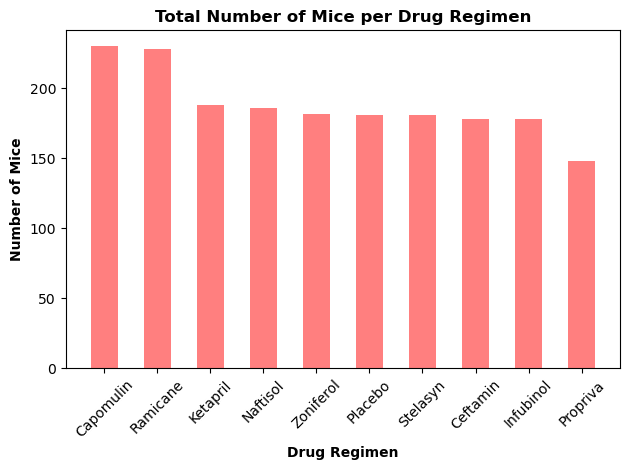

In [47]:
# Generate a bar plot showing the total number of mice for each treatment using matplotlib
# Set x axis
x_axis_regimen = np.arange(len(mice_count_per_regimen))
regimen_name = list(mice_count_per_regimen.index.values)

# Create bar chart
py_bar_mice_per_regimen = plt.bar(x_axis_regimen, mice_count_per_regimen, color='red', alpha=0.5, width=0.5)

# Set x/y label, title
plt.xticks(x_axis_regimen, regimen_name, rotation= 45)
plt.title('Total Number of Mice per Drug Regimen', fontweight = 'bold')
plt.xlabel('Drug Regimen', fontweight = 'bold')
plt.ylabel('Number of Mice', fontweight = 'bold')

# Save bar graph to Images folder
plt.tight_layout()

# Present the bar chart
plt.show()




In [48]:
# Calculate number of mice for each sex
sex_mice = clean_data_df.groupby('Sex')['Sex'].count()
sex_mice

# More male mice (958) were used for the experiment than female mice (922)

Sex
Female    922
Male      958
Name: Sex, dtype: int64

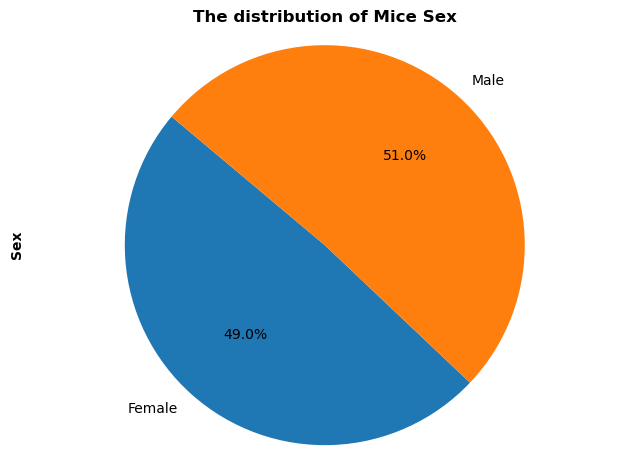

In [49]:
# Generate a pie chart using pandas
pd_pie_mice_sex = sex_mice.plot(kind='pie', autopct='%1.1f%%', startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Set x/y label, title
pd_pie_mice_sex.set_title(label='The distribution of Mice Sex', fontweight = 'bold')
pd_pie_mice_sex.set_ylabel('Sex', fontweight = 'bold')

# Save bar graph to Images folder
plt.tight_layout()


# Present the bar chart
plt.show()

# To close pyplot

# Observation
# 51.0% of the mice used for the experiment are males with 49% females


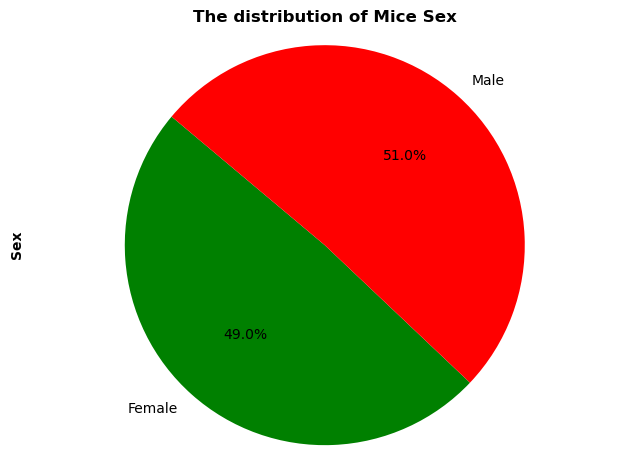

In [50]:
# Generate a pie chart using pyplot.
sex = sex_mice.index
colors = ['green','red']

# Create pie chart
pyplot_bar_mice_sex = plt.pie(sex_mice, labels=sex_mice.index, autopct="%1.1f%%", colors=colors, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Set x and y label, title
plt.title('The distribution of Mice Sex', fontweight = 'bold')
plt.ylabel('Sex', fontweight = 'bold')

# Save an image of pie chart
plt.tight_layout()


# Present the bar chart
plt.show()

# 51.0% of the mice used for the experiment are males with 49% females

In [53]:
# Calculate the final tumor volume of each mouse
final_tumor_vol = clean_data_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_df = final_tumor_vol.reset_index()
final_tumor_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
243,Zoniferol,q633,45,70.827796
244,Zoniferol,s337,45,62.109651
245,Zoniferol,w140,5,47.717952
246,Zoniferol,w575,45,68.401286


In [56]:
# Merge clean_data_df and final_tumor_df DataFrame
clean_final_tumor_df = pd.merge(clean_data_df, final_tumor_df, on = ["Mouse ID", "Mouse ID"], how = "outer")
clean_final_tumor_df

,Mouse ID,Drug Regimen_x,Sex,Age_months,Weight (g),Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites,Drug Regimen_y,Timepoint_y,Tumor Volume (mm3)_y
0,k403,Ramicane,Male,21,16,0,45.000000,0,Ramicane,45,22.050126
1,k403,Ramicane,Male,21,16,5,38.825898,0,Ramicane,45,22.050126
2,k403,Ramicane,Male,21,16,10,35.014271,1,Ramicane,45,22.050126
3,k403,Ramicane,Male,21,16,15,34.223992,1,Ramicane,45,22.050126
4,k403,Ramicane,Male,21,16,20,32.997729,1,Ramicane,45,22.050126
...,...,...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,Naftisol,45,73.867845
1876,z969,Naftisol,Male,9,30,30,65.841013,3,Naftisol,45,73.867845
1877,z969,Naftisol,Male,9,30,35,69.176246,4,Naftisol,45,73.867845
1878,z969,Naftisol,Male,9,30,40,70.314904,4,Naftisol,45,73.867845


In [57]:
# Creating list for treatment for loop and plot labels
regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor volume data
final_tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in regimen:

     # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    # add subset to tumor_vol_list 
    final_tumor_vol_list.append(final_tumor_vol)

    # Calculate the IQR and quantitatively
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) 
                  | (final_tumor_vol > upper_bound)]

     # Print out the result
    print(f"{drug} Regimen")
    print(f"Final tumor volume(mm3) for {drug} below {round(lower_bound,2)} could be outliers.")
    print(f"Final tumor volume(mm3) for {drug} above {round(upper_bound,2)} could be outliers.")
    print(f"Average tumor volume(mm3) for {drug} is: {round(mean,2)}")
    print(f"Number of outliers for Capomulin is: {outliers.count()}")
    if outliers.count() > 0:
        for i in outliers.index:
            print(f'Outlier final tumor volume(mm3) is {round(outliers[i], 2)}')
    print('----------------------------------------------------------')



Capomulin Regimen
Final tumor volume(mm3) for Capomulin below 20.7 could be outliers.
Final tumor volume(mm3) for Capomulin above 51.83 could be outliers.
Average tumor volume(mm3) for Capomulin is: 36.67
Number of outliers for Capomulin is: 0
----------------------------------------------------------
Ramicane Regimen
Final tumor volume(mm3) for Ramicane below 17.91 could be outliers.
Final tumor volume(mm3) for Ramicane above 54.31 could be outliers.
Average tumor volume(mm3) for Ramicane is: 36.19
Number of outliers for Capomulin is: 0
----------------------------------------------------------
Infubinol Regimen
Final tumor volume(mm3) for Infubinol below 36.83 could be outliers.
Final tumor volume(mm3) for Infubinol above 82.74 could be outliers.
Average tumor volume(mm3) for Infubinol is: 58.18
Number of outliers for Capomulin is: 1
Outlier final tumor volume(mm3) is 36.32
----------------------------------------------------------
Ceftamin Regimen
Final tumor volume(mm3) for Ceftami

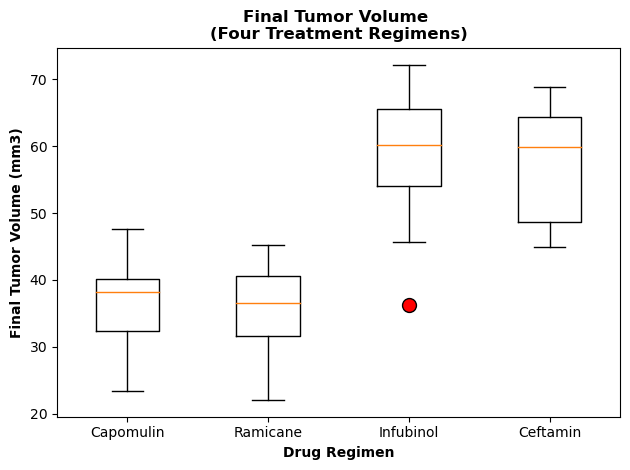

In [64]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_vol_list, labels=regimen, flierprops={'markerfacecolor':'r','markersize': 10})

# Set x/y label, title
final_tumor_plot.set_title('Final Tumor Volume \n(Four Treatment Regimens)', fontweight='bold')
final_tumor_plot.set_xlabel('Drug Regimen', fontweight='bold')
final_tumor_plot.set_ylabel('Final Tumor Volume (mm3)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()


# Present the box plot chart
plt.show()



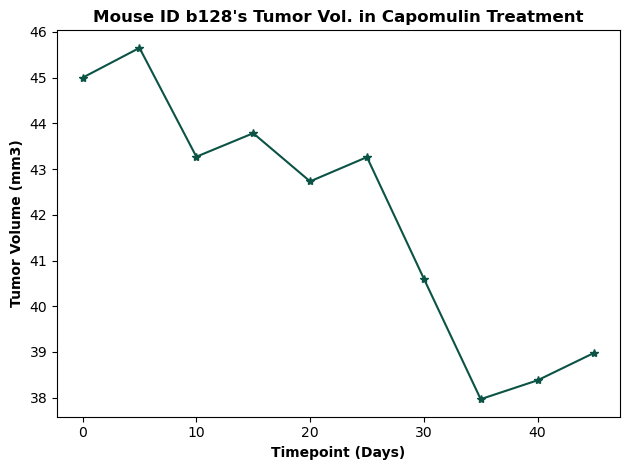

In [66]:
# Generate dataframe only in Capomulin Regimen
Capomulin_df = clean_data_df.loc[clean_data_df['Drug Regimen'] == 'Capomulin']

# Identify specific mouse ID and get data of the mouse id
mouse_id = 'b128'
mouse_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == mouse_id]

# Generate a line plot
time_vol = plt.plot(mouse_df['Timepoint'], mouse_df['Tumor Volume (mm3)'], marker='*', color='#0B5345')

# Set x/y label, title
plt.title(f"Mouse ID {mouse_id}'s Tumor Vol. in Capomulin Treatment", fontweight='bold')
plt.xlabel('Timepoint (Days)', fontweight='bold')
plt.ylabel('Tumor Volume (mm3)', fontweight='bold')

# Save line graph to Images folder
plt.tight_layout()


# Present the box plot chart
plt.show()

# Three Observation
# Tumor volume got to its peak at 45.8 when timepoint is 5 days during capomulin treatment
# There was a sharp decline in tumor volume at 10 days timepoint during capomulin treatment
# From a timepoint of 25 days, tumor volume decline drastically to 36 , it then increased to 39 above time point of 40 days

C:\Users\pato2\AppData\Local\Temp\ipykernel_22252\1992177416.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Capomulin_gp = Capomulin_df.groupby('Mouse ID').mean()


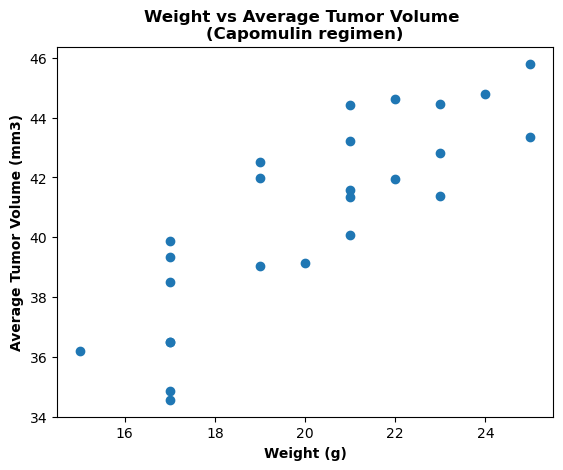

In [67]:
# Calculate mean of Weight (g) and Tumor Volume (mm3) based on Mouse ID
Capomulin_gp = Capomulin_df.groupby('Mouse ID').mean()
mice_weight_avg = Capomulin_gp['Weight (g)']
mice_tumor_avg = Capomulin_gp['Tumor Volume (mm3)']

# Generate a scatter plot
plt.scatter(mice_weight_avg, mice_tumor_avg)

# Label axes
plt.title('Weight vs Average Tumor Volume \n(Capomulin regimen)', fontweight='bold')
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')


# Present the box plot chart
plt.show()

# Observations
# there is a positive correlation between average tumor volume and weight of  mice

The correlation between mouse weight and tumor vol is 0.84
The r-squared is: 0.71


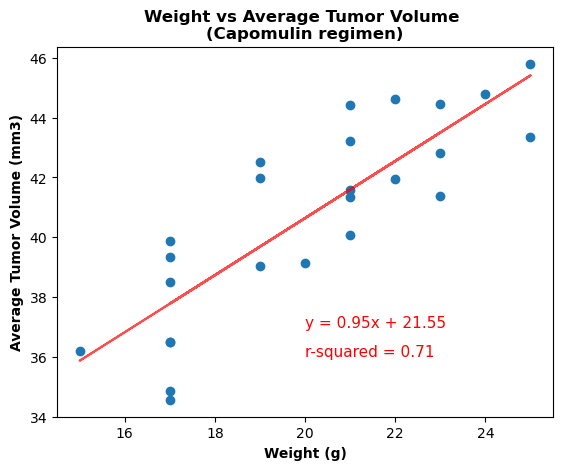

In [68]:
# Define x,y values
x_values = mice_weight_avg
y_values = mice_tumor_avg

# Calculate the correlation
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation between mouse weight and tumor vol is {correlation}")

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Calculate r-squared
r_squared = round(rvalue**2,2)
print(f"The r-squared is: {r_squared}")

# y = mx + b
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(line_eq,(20,37), fontsize=11, color="red")
plt.annotate(f'r-squared = {r_squared}', (20,36), fontsize=11, color="red")

# Define title and x/y labels
plt.title('Weight vs Average Tumor Volume \n(Capomulin regimen)', fontweight='bold')
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')


# Present the box plot chart
plt.show()

# To close pyplot
plt.close()